<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/27%20-%20Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etude de cas de classification : Les types spectraux d'étoiles
# Mattias EYHERABIDE

L'objectif de ce sujet d'apprentissage automatique est de déterminer d'après des données de la NASA, un type spectral d'étoile entre : 

- Red Dwarf
- Brown Dwarf
- Main Sequence
- Super Giants
- Hyper Giants

Nous disposons ici de differentes variables de features.
Les noms ont été simplifiés, pour plus de clareté voici à quoi elle correspondent :

- L correspond à la luminosité relative
- R correspond au radius relatif
- A_M correspond à la magnitude absolue (Absolute Magnitude).

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Dataset/Stars.csv')

In [3]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


## Checklist de base
### Analyse de forme : 
- **Variable target** : Type
- **lignes et colonnes** : 240, 7
- **Type de variables** : Majortiée de numérique, le reste sont objet (ici du texte)
- **Analyse des valeurs manquantes** : Aucunes valeurs manquantes


## Exploration des données

#### Détermination de la taille du dataset

In [4]:
df = data.copy()
df.shape

(240, 7)

#### Analyse des type de données

<AxesSubplot:ylabel='None'>

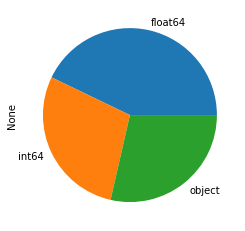

In [5]:
df.dtypes.value_counts().plot.pie()

#### Recherche de valeurs manquantes

In [6]:
df.isna().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

### Exemen de la colonne target

In [7]:
df['Type'].value_counts(normalize=True)

5    0.166667
4    0.166667
3    0.166667
2    0.166667
1    0.166667
0    0.166667
Name: Type, dtype: float64

### Exemen des features

#### Anayse des types objets

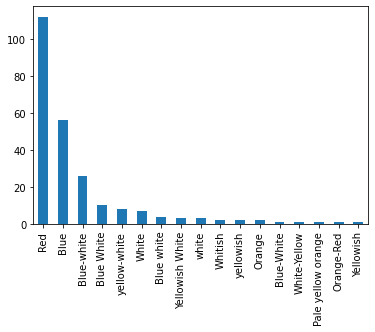

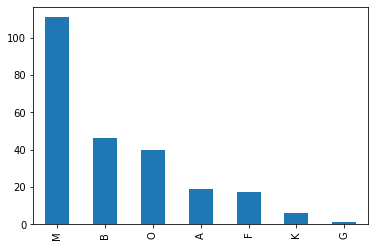

In [8]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.bar()

In [9]:
df['Color'].value_counts(normalize=True)

Red                   0.466667
Blue                  0.233333
Blue-white            0.108333
Blue White            0.041667
yellow-white          0.033333
White                 0.029167
Blue white            0.016667
Yellowish White       0.012500
white                 0.012500
Whitish               0.008333
yellowish             0.008333
Orange                0.008333
Blue-White            0.004167
White-Yellow          0.004167
Pale yellow orange    0.004167
Orange-Red            0.004167
Yellowish             0.004167
Name: Color, dtype: float64

In [10]:
df['Spectral_Class'].value_counts(normalize=True)

M    0.462500
B    0.191667
O    0.166667
A    0.079167
F    0.070833
K    0.025000
G    0.004167
Name: Spectral_Class, dtype: float64

Nous pouvons voir ici que notre dataset dispose de 17 couleurs différentes avec une majoritée de rouge (46%) ainsi que 7 classes spectrales différentes avec une majoritée de M (46%).

Avec les données de wikipedia nous constatons que les données sont logiques, effectivement une majoritées des étoiles sont des naines rouges (https://fr.wikipedia.org/wiki/Type_spectral#Type_M)

In [11]:
cor_object = pd.crosstab(df['Color'], df['Spectral_Class'])
cor_object

Spectral_Class,A,B,F,G,K,M,O
Color,,,,,,,
Blue,0,16,0,0,0,0,40
Blue White,1,9,0,0,0,0,0
Blue white,2,2,0,0,0,0,0
Blue-White,1,0,0,0,0,0,0
Blue-white,8,18,0,0,0,0,0
Orange,0,0,0,0,1,1,0
Orange-Red,0,0,0,0,1,0,0
Pale yellow orange,0,0,1,0,0,0,0
Red,0,0,0,1,1,110,0


<AxesSubplot:xlabel='Color'>

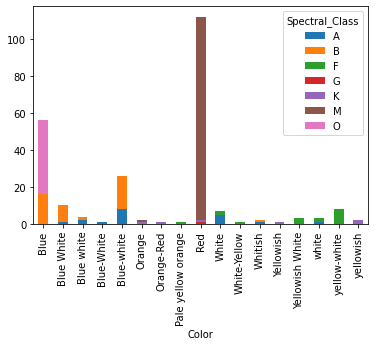

In [12]:
cor_object.plot.bar(stacked=True)

Nous pouvons ici voir une forte corellation des données entre la couleur et la classe spectrale.

#### Histogrames des variables continues

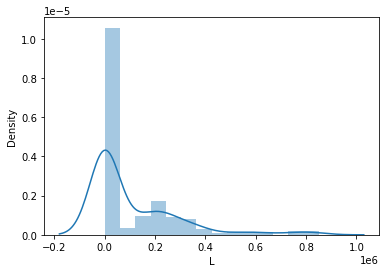

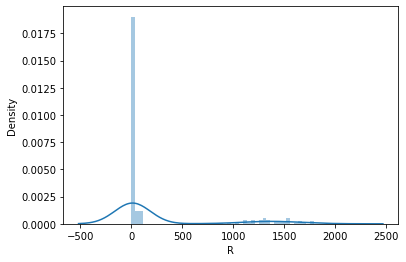

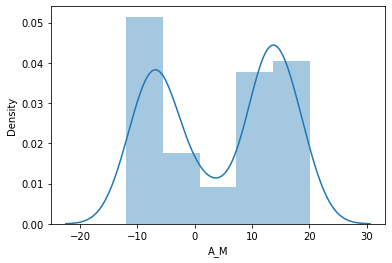

In [13]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

### Correlation des données

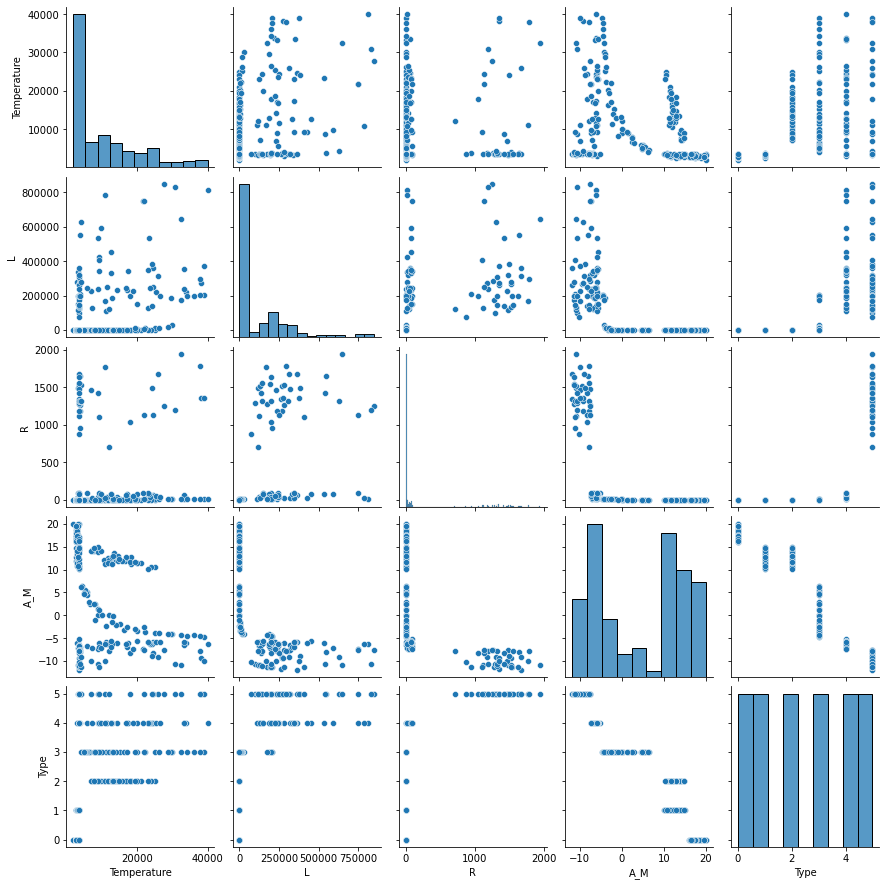

In [14]:
sns.pairplot(df)

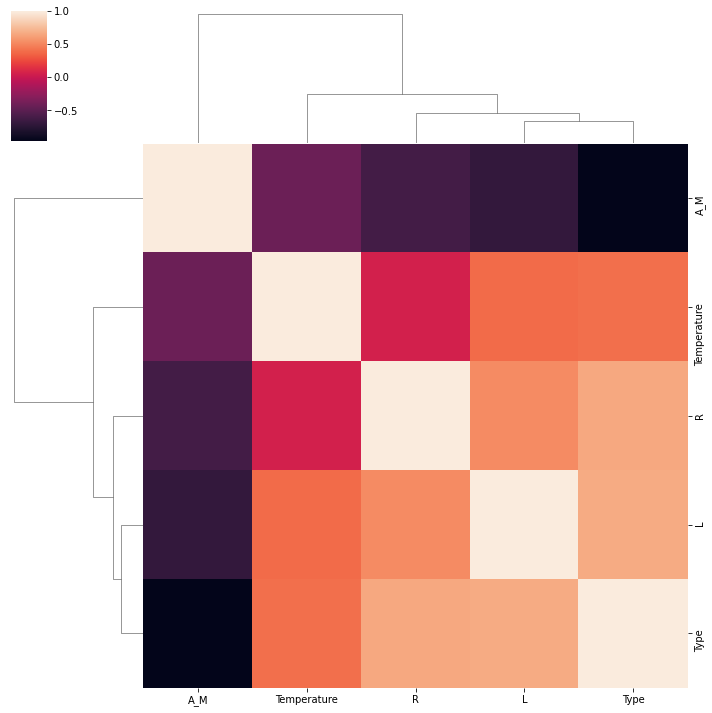

In [15]:
sns.clustermap(df.corr())

## Relation des données

### Relation Type/Temperature

<function matplotlib.pyplot.show(close=None, block=None)>

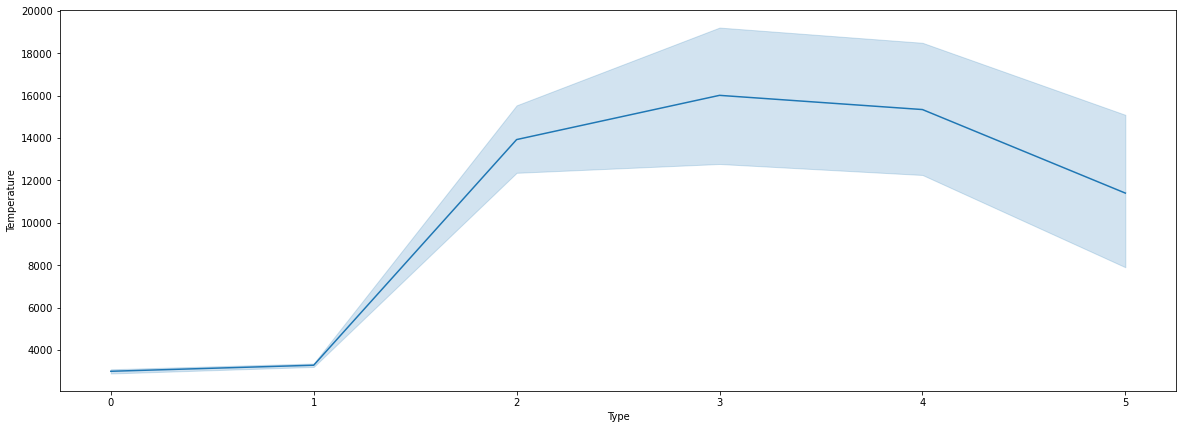

In [16]:
plt.figure(figsize=(20,7))
sns.lineplot(x="Type", y="Temperature", data=df)
plt.show

### Relation Type/Luminosité relative

<function matplotlib.pyplot.show(close=None, block=None)>

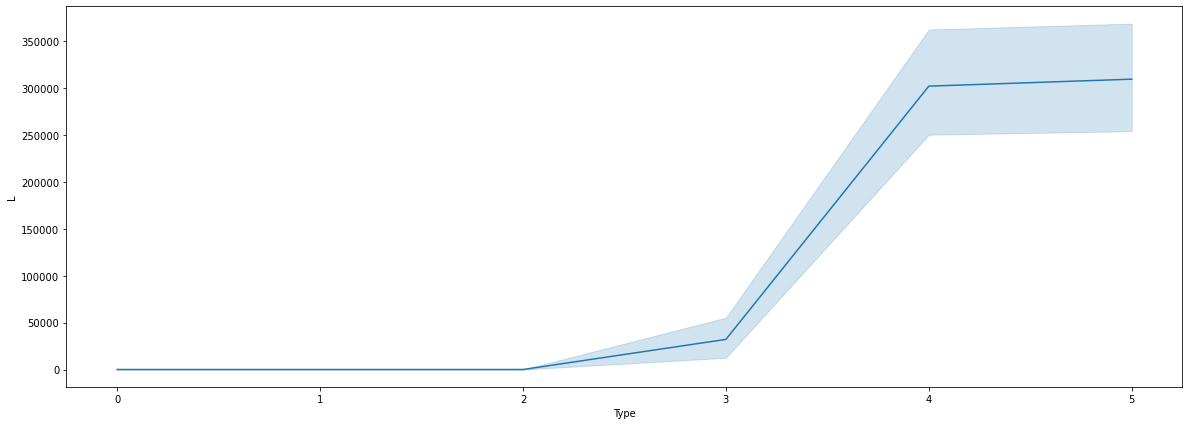

In [17]:
plt.figure(figsize=(20,7))
sns.lineplot(x="Type", y="L", data=df)
plt.show

### Relation Type/Radius relatif

<function matplotlib.pyplot.show(close=None, block=None)>

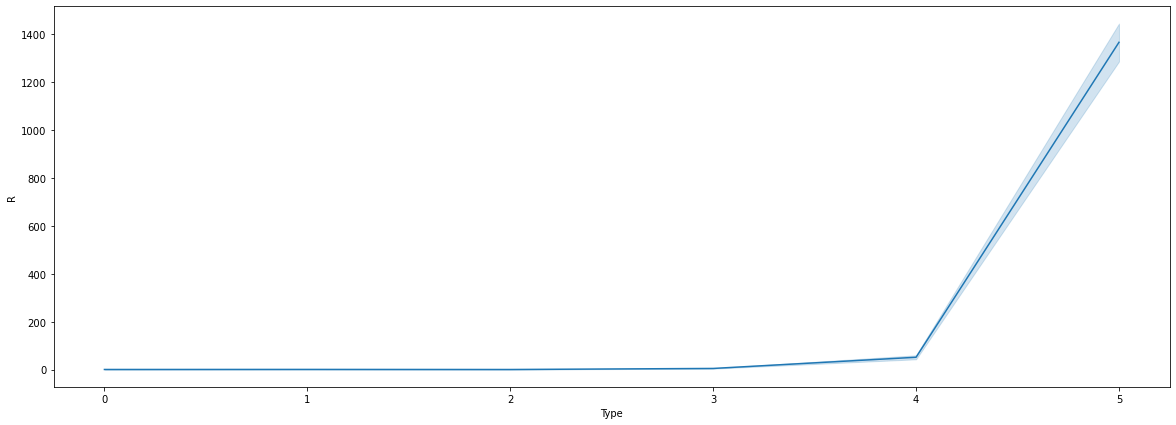

In [18]:
plt.figure(figsize=(20,7))
sns.lineplot(x="Type", y="R", data=df)
plt.show

### Relation Type/Magnitude absolue

<function matplotlib.pyplot.show(close=None, block=None)>

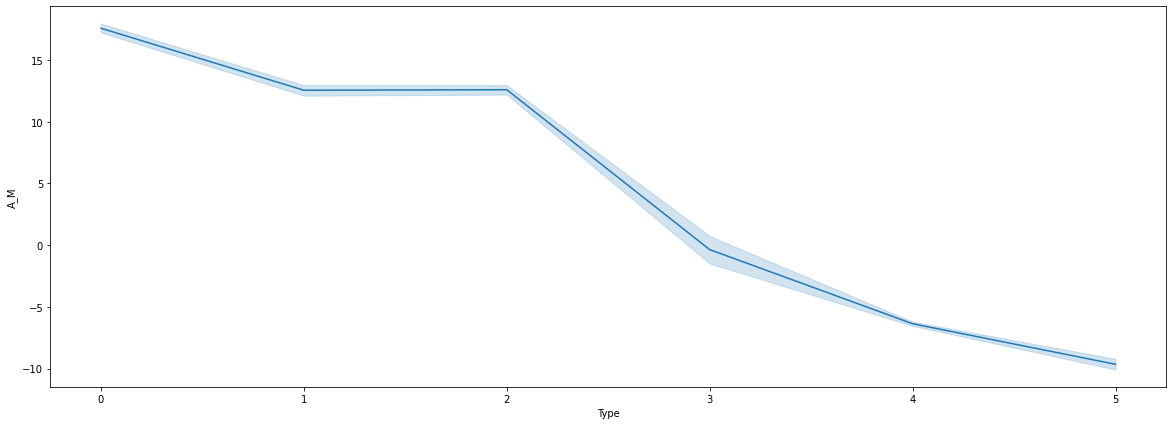

In [19]:
plt.figure(figsize=(20,7))
sns.lineplot(x="Type", y="A_M", data=df)
plt.show

### Relation Magnitude Absolue/Luminosité Relative/Radius Relatif

In [20]:
from mpl_toolkits.mplot3d import Axes3D

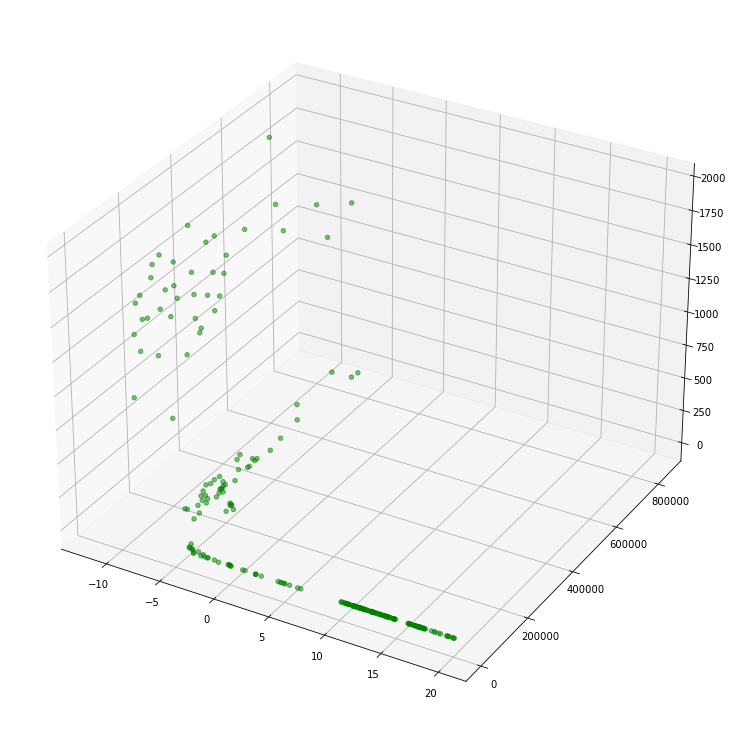

In [21]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(df["A_M"], df["L"], df["R"], c="green", s=20, alpha=0.5)
plt.show()

### Conclusion relations

Avec ses observations de relations, nous constatons que nos données sont correlées correctement. Nous pouvons en déduire que les entrainements et estimation de modèles seront assez simple et surtout efficaces.

Du plus, aucuns prétraitement n'est nécessaire.

In [24]:
pandas_profiling.ProfileReport(df)

## Estimations

### Comparaison des modèles